Passo a passo:

1. Extração de dados (Começar com selenium e ver se tem algum melhor):
    - Fazer webscrapping da página: https://ofertasmateus.com/ba/juazeiro
    - Armazenar cada loja e automatizar para procurar no google
    - Pegar automaticamente o nome da loja e botar num df
    - Possivelmente já pegar latitude e longitude, separar coluna de cidade, estado, bairro (granularidade)
    - Ainda é preciso achar os concorrentes e tentar plotar tb, vish
2. Plotar no mapa essas lojas
3. Análise canibalismo, estratégia, etc
    - Relacionar na estratégia com os dados demográficos:
            - Ver as lojas muito perto e destacar no gráfico
    - https://dados.gov.br/organization/instituto-brasileiro-de-geografia-e-estatistica-ibge?q=Demogr%C3%A1fico&sort=score+desc%2C+metadata_modified+desc
4. Tentar Usar Classes

5. Comparar com censo, quantidade de pessoas no município, mas mais importante a quantidade de consumidores, tanto de renda quanto de idade, etc

Primeiro ao invés de fazer a lista automaticamete das lojas, tentar fazer uma tabela roubada e tentar plotar no mapa
dando certo ai volto e automatizo essa parte

- Tem uma api que procura coisas no google tb, vale a pena?
- Separar tipo de loja por cor e se der colocar o ícone da loja no mapa
- fazer regex para separar Estado | Cidade | Endereço, etc

In [351]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import time

In [221]:
from selenium.webdriver import Firefox, Chrome
from time import sleep

In [225]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
driver = webdriver.Firefox()

In [244]:
# Rever dev.ensiva - fazer igual a 2ª parte em que não precisa usar sleep

# Opening browser
f = Firefox() # Opens firefox

url = 'https://ofertasmateus.com'
f.get(url) # opens the url defined

# Waiting webpage to load
sleep(3)

In [245]:
# Test - diferentes estados, cidades e lojas

estado = f.find_element_by_xpath('//*[@id="optEstado"]').text
print(estado)

In [234]:
estados = f.find_element_by_id('optEstado').text
print(estados)

In [243]:
from selenium.webdriver.support.select import Select

select = Select(f.find_element_by_id('optEstado'))
select
# selecionando pelo texto visivel
#select.select_by_visible_text('Bahia')

# Selecionando pelo valor
#select.select_by_value('30632-N-PR-2')

AttributeError: 'Select' object has no attribute 'text'

In [366]:
import requests

page = requests.get("https://ofertasmateus.com/")
page

<Response [200]>

In [367]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(page.content, 'html.parser')

In [251]:
# html da página
#print(soup.prettify())

In [301]:
soup.find_all('select')

[<select aria-label=".form-select-lg example" class="form-select form-select-lg mb-3 ui search dropdown" id="optEstado" onchange="mudarEstado(this.value)">
 <option value="">Escolha o Estado</option>
 <option value="ba">Bahia</option>
 <option value="ce">Ceará</option>
 <option value="ma">Maranhão</option>
 <option value="pa">Pará</option>
 <option value="pe">Pernambuco</option>
 <option value="pi">Piauí</option>
 </select>]

In [302]:
# Já é alguma coisa
estados = soup.find_all(id="optEstado")[0].get_text()
estados = estados.split('\n')

estados[2:-1]

['Bahia', 'Ceará', 'Maranhão', 'Pará', 'Pernambuco', 'Piauí']

In [321]:
# Tentando pegar as siglas com datacamp
from urllib.request import urlopen
from bs4 import BeautifulSoup


In [322]:
url = "https://ofertasmateus.com/"
html = urlopen(url)

In [323]:
soup = BeautifulSoup(html, 'lxml')
type(soup)

bs4.BeautifulSoup

In [325]:
# Get the title
title = soup.title
print(title)

<title>Ofertas Grupo Mateus - Encartes e Promoções</title>


In [328]:
# Print out the text
text = soup.get_text()
#print(soup.text)

In [336]:
soup.find_all('div')

[]

In [348]:
all_links = soup.find_all("div")
for link in all_links:
    print(link.get("class"))

['container', 'px-5']
['collapse', 'navbar-collapse']
['btn', 'btn-verde', 'rounded-pill', 'px-3', 'mb-2', 'mb-lg-0']
['container', 'px-5']
['row', 'gx-5', 'align-items-top']
['col-lg-4']
None
['mb-5', 'mb-lg-0', 'text-center', 'text-lg-start']
['col-lg-8']
['container', 'px-5']
['row']
['col-lg-3', 'text-center']
['col-lg-3', 'text-center']
['col-lg-3', 'text-center']
['col-lg-3', 'text-center']
['container', 'px-5']
['text-white-50', 'small']
['mb-2']
['btn', 'btn-info', 'rounded-pill', 'px-3', 'mb-2', 'mb-lg-0']
['btn', 'btn-info', 'rounded-pill', 'px-3', 'mb-2', 'mb-lg-0']


In [370]:
soup.find_first('//select[@id="optEstado"]')

TypeError: 'NoneType' object is not callable

# Plot no Mapa

In [ ]:
# https://www.youtube.com/watch?v=yMyU1i6-aZk

In [178]:
import geopandas as gpd

#### O vídeo que resolveu a parada: 
#- Como instalar o GEOPANDAS no ANACONDA NAVIGATOR
#- https://www.youtube.com/watch?v=6yuBh0aYU00
    
##### Dependências para baixar geopandas:
Todas podem ser baixadas com pip install ou por aqui: 
- https://www.lfd.uci.edu/~gohlke/pythonlibs/

- #pip install descartes
- #pip install shapely
- #pip install pyproj
- #pip install Fiona # Essa só direto no site
- #pip install GDAL # Essa só direto no site

# Pegando tabelas direto do IBGE - Sidrapy

In [227]:
import sidrapy

In [229]:
# Importando dataframes usando sidrapy - sidrapy parece não estar funcionando
start_time = time.time()
'''
Cola:

    t (table_code) = 1620
    n (territorial_level) = 1
    n/ (ibge_territorial_code) = all
    v (variable) = all
    p (period) = all
    c/ (categories) = 11255/90707
'''

#ipca_i2012_weight = sidrapy.get_table(table_code='1419', territorial_level="1", ibge_territorial_code="all", period='last 96', variable='66', classification='315/all')
#ipca_i2012_var = sidrapy.get_table(table_code='1419', territorial_level="1", ibge_territorial_code="all", period='last 96', variable='63', classification='315/all')

#ipca_i2020_weight = sidrapy.get_table(table_code='7060', territorial_level="1", ibge_territorial_code="all", period='last 18', variable='66', classification='315/all')
#ipca_i2020_var = sidrapy.get_table(table_code='7060', territorial_level="1", ibge_territorial_code="all", period='last 18', variable='63', classification='315/all')

pop = sidrapy.get_table(table_code='6579',
                        territorial_level="all",
                        ibge_territorial_code="all",
                        period='all', variable='all',
                        categories='11255/90707')
# https://apisidra.ibge.gov.br/values/t/6579/n1/all/n2/all/n3/all/n6/all/v/all/p/last%201

end_time = time.time()
print(f"Result calculated in {end_time - start_time} sec")

SSLError: HTTPSConnectionPool(host='apisidra.ibge.gov.br', port=443): Max retries exceeded with url: /values/t/1419/n1/all/p/last%2096/v/66/c315/all (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1123)')))

# Tabela interessantes baixadas do ibge relacionadas a demografia e interessantes para a análise - O melhor de tudo é que vem uma última coluna com o multipolygon

Limitação: censo pode estar defasado

Fonte: https://dados.gov.br/organization/instituto-brasileiro-de-geografia-e-estatistica-ibge?q=Demogr%C3%A1fico&sort=score+desc%2C+metadata_modified+desc

- Fazer um merge dessas tabelas com a tabela lá embaixo das lojas (juntar apenas os municípios que tem nas 2)

In [171]:
# https://dados.gov.br/dataset/cgeo_vw_razaodependencia
'''
Razão entre a população potencialmente inativa (0 a 14 anos e 65 anos ou mais de idade) e a população potencialmente 
ativa(15 a 64 anos de idade), na data de referência do Censo Demográfico.Fonte: IBGE, Censo Demográfico 2010 e Malha 
municipal 2010.
'''

dependencia = pd.read_csv('vw_razaodependencia.csv')
dependencia

,FID,gid,UF,nome,Censo,PESSde0a14anos,PESS65oumais,PESSde15a64anos,RAZAODEPENDENCIA,descricao,legenda,classe,geom
0,vw_razaodependencia.fid--515dea1_180eeae6eb6_3548,215,BAHIA,Tremedal,2010.0,3913,2174,10938,55.650028,Razão de Dependência,"45,86 - 59,15",3,MULTIPOLYGON (((-41.458803305191566 -14.781415...
1,vw_razaodependencia.fid--515dea1_180eeae6eb6_3549,306,RIO GRANDE DO SUL,Turuçu,2010.0,716,318,2457,42.083843,Razão de Dependência,"40,01 - 45,86",2,MULTIPOLYGON (((-52.035349932081274 -31.567509...
2,vw_razaodependencia.fid--515dea1_180eeae6eb6_354a,900,ESPIRITO SANTO,Vitória,2010.0,63120,26948,237733,37.886200,Razão de Dependência,"- 40,01",1,MULTIPOLYGON (((-40.3292566978242 -20.23997417...
3,vw_razaodependencia.fid--515dea1_180eeae6eb6_354b,3613,MINAS GERAIS,Jacutinga,2010.0,4966,1855,15937,42.799774,Razão de Dependência,"40,01 - 45,86",2,MULTIPOLYGON (((-46.50528160015326 -22.3400120...
4,vw_razaodependencia.fid--515dea1_180eeae6eb6_354c,1028,PIAUÍ,Nazária,2010.0,2369,646,5038,59.845177,Razão de Dependência,"59,15 - 71,06",4,POLYGON ((-42.826685407155495 -5.3480291684437...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5561,vw_razaodependencia.fid--515dea1_180eeae6eb6_5458,5254,SANTA CATARINA,Campo Erê,2010.0,2435,776,6139,52.304935,Razão de Dependência,"45,86 - 59,15",3,MULTIPOLYGON (((-53.024131281087385 -26.361357...
5562,vw_razaodependencia.fid--515dea1_180eeae6eb6_5459,2749,PARANÁ,Planalto,2010.0,2765,1387,9493,43.737492,Razão de Dependência,"40,01 - 45,86",2,MULTIPOLYGON (((-53.61882711231503 -25.6460599...
5563,vw_razaodependencia.fid--515dea1_180eeae6eb6_545a,3779,SÃO PAULO,Guararapes,2010.0,5985,3183,21428,42.785141,Razão de Dependência,"40,01 - 45,86",2,MULTIPOLYGON (((-50.70271677275949 -21.0257124...
5564,vw_razaodependencia.fid--515dea1_180eeae6eb6_545b,617,RIO GRANDE DO SUL,Barra do Guarita,2010.0,729,259,2074,47.637417,Razão de Dependência,"45,86 - 59,15",3,MULTIPOLYGON (((-53.778785810369236 -27.152703...


In [128]:
# Testando se tem algumas das cidades em que o grupo tem lojas
# Show, além de mostrar A população, tb mostra
dependencia[dependencia['nome'] == 'Juazeiro']

,FID,gid,UF,nome,Censo,PESSde0a14anos,PESS65oumais,PESSde15a64anos,RAZAODEPENDENCIA,descricao,legenda,classe,geom
1832,vw_razaodependencia.fid--515dea1_180eeae6eb6_40ed,4607,BAHIA,Juazeiro,2010.0,55358,10733,131874,50.116779,Razão de Dependência,"45,86 - 59,15",3,MULTIPOLYGON (((-40.70452242232844 -9.44676652...


In [129]:
# Testando se tem algumas das cidades em que o grupo tem lojas
dependencia[dependencia['nome'] == 'Piripiri']

,FID,gid,UF,nome,Censo,PESSde0a14anos,PESS65oumais,PESSde15a64anos,RAZAODEPENDENCIA,descricao,legenda,classe,geom
3849,vw_razaodependencia.fid--515dea1_180eeae6eb6_4d54,5423,PIAUÍ,Piripiri,2010.0,15914,5450,40462,52.800159,Razão de Dependência,"45,86 - 59,15",3,MULTIPOLYGON (((-41.49547793293951 -4.17600838...


# Concorrentes

"Os maiores concorrentes da rede são as varejistas Carrefour Brasil, GPA e Cencosud", segundo:
https://tc.com.br/noticias/empresas/maior-ipo-do-ano-no-brasil-grupo-mateus-busca-concorrer-com-supermercadistas

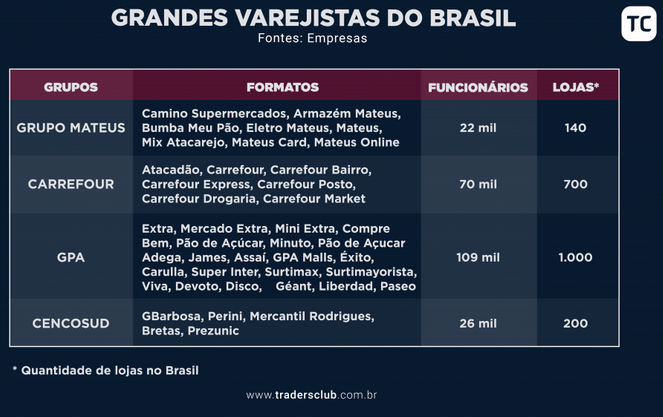

Ou

"O banco não descarta que players nacionais, como Pão de Açúcar, Carrefour e Grupo Big tentem aumentar sua presença nas regiões de origem do Grupo Mateus — 12% das lojas do GPA e 23% das lojas do Carrefour estão nas regiões Norte e Nordeste. No entanto, “a capilaridade de suas lojas, sua estrutura logística e sua escala criam um ambiente mais duro para novos [e antigos] entrantes”, dizem os analistas do banco."
fonte: https://exame.com/negocios/as-armas-do-grupo-mateus-para-bater-gpa-e-carrefour-no-nordeste/ de nov/2020

Na visão dos analistas do BTG, “embora o Grupo Mateus tenha superado os jogadores nacionais, a verdadeira competição nos próximos anos virá de pares regionais com muito menos escala. Ou seja, apesar de grandes players já conhecidos, há de se ficar atentos aos concorrentes regionais, que apesar de menores tem bastante capilaridade e conhecimento no nordeste

Adendos Carrefou comprou grupo Big
Lojas Assaí

# Mapa com outro vídeo de referência - matplotlib

- Visualização de mapas com matplotlib
- https://www.youtube.com/watch?v=YFFTe36Xkxo

In [ ]:
!apt-get install libgeos=3.5.0

# Plot Mapa - folium

In [3]:
import folium

In [102]:
# Definindo a base do mapa
mapa = folium.Map(location=[-9.447687335487565, -40.4921125539743],
                  tiles = 'Stamen terrain',
                  zoom_start=5)

In [103]:
# Adicionando o ícone
folium.Marker(location=[-9.447687335487565, -40.4921125539743], 
              popup='<i>Mix Mateus - Joazeiro</i>', 
              tooltip='Clique Aqui').add_to(mapa)

# Trocar cor do ícone 'icon=folium.Icon(color='red')' <- Dá pra personalizar e colocar imagem, colocar logo dos mercados

In [104]:
# Adiciona o círculo em volta do ícone
folium.CircleMarker(location=[-9.447687335487565, -40.4921125539743],
                   radius=50,
                   color='#3186cc',
                   fill=True,
                   fill_color='#3186cc',).add_to(mapa)

In [107]:
# Função para mostrar latitude e longitude ao se clicar no mapa
mapa.add_child(folium.LatLngPopup())

- Daqui pra frente tentando aplicar a visualização ao problema em si usando esse vídeo de apoio:
    - Plotando Mapas Interativos com Python - (Visualize dados de Vendas por Região)
    - https://www.youtube.com/watch?v=EElW-W0GmrA

In [4]:
from folium import plugins

# Geolocalização - Obter as coordenadas de um endereço

- Vídeo de referência: 
    - Como converter ENDEREÇOS em coordenadas LATITUDE e LONGITUDE | Python na Prática #18
    - https://www.youtube.com/watch?v=asSNKH_ee0M
    

In [21]:
#pip install geopy
from geopy.geocoders import Nominatim

In [22]:
adress = 'Alto da Alianca, Juazeiro, BA'
locator = Nominatim(user_agent='myGeocoder')
location = locator.geocode(adress)

In [24]:
print(location.point)

9 26m 44.6374s S, 40 29m 52.3529s W


# Outro jeito de coordenadas com geopandas

- PowerBI - Como converter endereço em coordenadas - Python Geocoding GeoPandas
- https://www.youtube.com/watch?v=cWUoDFzH9LA

In [99]:
# Pegando as coordenadas - Teste
gpd.tools.geocode('BR-230, S/N, Sambaíba, Floriano, Piaui', provider='photon', user_agent="my-application")

,geometry,address
0,POINT (-43.00693 -6.76986),"Escola Municipal Raimundinha Carvalho, 64804-1..."


In [107]:
df = pd.read_excel('Tabela Roubada - Localização das lojas.xlsx')
df

,Tipo de Loja,Loja,Estado,Cidade,Bairro,Logradouro,All,Cep,Telefone,Avaliações
0,Mix Mateus,Atacarejo - Juazeiro,Ba,Juazeiro,Alto da Alianca,"Av. Epitacio Pessoa, S/N","Alto da Alianca, Juazeiro, Ba",NaN,NaN,NaN
1,Mix Mateus,Teixeira de freitas,Ba,Teixeira de freitas,Setor Bahia Sul,"Av. Pres. Getúlio Vargas, 7979","Setor Bahia Sul, Teixeira de freitas, Ba",NaN,NaN,NaN
2,Mix Mateus,Floriano,PI,Floriano,Sambaíba,"BR-230, S/N","Sambaíba, Floriano, PI",64804-140,NaN,NaN
3,Mix Mateus,Parnaíba,PI,Parnaíba,Reis Veloso,"R. Projetada, 67","Reis Veloso, Parnaíba, PI",NaN,NaN,NaN
4,Mateus Supermercados,Piripiri,PI,Piripiri,Morro da Saudade,"Av. Dep. Raimundo Holanda, 1319","Morro da Saudade, Piripiri, PI",64260-000,NaN,NaN
5,Mix Mateus,Terezina Zona Sul,PI,Teresina,Parque São João,"Av. Henry Wall de Carvalho, 5300A","Parque São João, Teresina, PI",64020-720,NaN,NaN
6,Mix Mateus,Terezina Zequinha Freire,PI,Teresina,Uruguai,"Av. Zequinha Freire, 1350","Uruguai, Teresina, PI",64073-020,NaN,NaN


In [85]:
# função pra tirar o S/N de algum endereço - ALGO TÃO SIMPLES E NÃO TÁ INDO, VOLTAR AQUI DEPOIS
# Função para dar mais precisão na hora de pegar as coordenadas, quando tem s/n no endereço dá uns bugs as vezes

def remove_sn(n):
    if 'S/N' in n:
        return n.replace(', S/N', '')
        
        

In [91]:
txt = 'Av. Epitacio Pessoa, S/N'

remove_sn(df['Logradouro'])

In [92]:
# Aplicando - Tá tornando os valores em 'none'
df['Logradouro'].apply(remove_sn(df['Logradouro']))

# Testando se deu certo
df['Logradouro']

0    None
1    None
2    None
3    None
4    None
5    None
6    None
Name: Logradouro, dtype: object

In [108]:
# Pegando as coordenadas para todas as lojas - Algumas divergências quando coloco logradouro o endereço completo
# Tentar fazer alguma função que se não estiver none passa, mas se tiver usa o bairro, depois cidade e assim por diante
# A partir do bairro no "all" já ficou mais satisfatório e pegou todas as coordenadas com sucesso

coordinates = gpd.tools.geocode(df['All'], provider='photon', user_agent="my-application")
coordinates

,geometry,address
0,POINT (-40.49788 -9.44573),"Alto da Aliança, 48924-999, Juazeiro, Bahia, B..."
1,POINT (-40.23924 -16.97510),"Cruzeiro do Sul, 45955-000, Vereda, Bahia, Brasil"
2,POINT (-43.00706 -6.77265),"Floriano, Piauí, Brasil"
3,POINT (-41.57853 -2.91046),"Avenida Antonieta Reis Veloso, Luís Correia, P..."
4,POINT (-42.48523 -14.06471),"Movimente Fisioterapia e Pilates, Rua Ladeira ..."
5,POINT (-42.80145 -5.13074),"Parque São João, 64019732, Teresina, Piauí, Br..."
6,POINT (-42.74065 -5.06457),"Uruguai, 64030445, Teresina, Piauí, Brasil"


In [109]:
df['Coordenada'] = coordinates['geometry']

In [110]:
# Aqui só faltaria tratar para separar a latitude da longitude
# Talvez no geopandas nem precise separar 
df

,Tipo de Loja,Loja,Estado,Cidade,Bairro,Logradouro,All,Cep,Telefone,Avaliações,Coordenada
0,Mix Mateus,Atacarejo - Juazeiro,Ba,Juazeiro,Alto da Alianca,"Av. Epitacio Pessoa, S/N","Alto da Alianca, Juazeiro, Ba",NaN,NaN,NaN,POINT (-40.49788 -9.44573)
1,Mix Mateus,Teixeira de freitas,Ba,Teixeira de freitas,Setor Bahia Sul,"Av. Pres. Getúlio Vargas, 7979","Setor Bahia Sul, Teixeira de freitas, Ba",NaN,NaN,NaN,POINT (-40.23924 -16.97510)
2,Mix Mateus,Floriano,PI,Floriano,Sambaíba,"BR-230, S/N","Sambaíba, Floriano, PI",64804-140,NaN,NaN,POINT (-43.00706 -6.77265)
3,Mix Mateus,Parnaíba,PI,Parnaíba,Reis Veloso,"R. Projetada, 67","Reis Veloso, Parnaíba, PI",NaN,NaN,NaN,POINT (-41.57853 -2.91046)
4,Mateus Supermercados,Piripiri,PI,Piripiri,Morro da Saudade,"Av. Dep. Raimundo Holanda, 1319","Morro da Saudade, Piripiri, PI",64260-000,NaN,NaN,POINT (-42.48523 -14.06471)
5,Mix Mateus,Terezina Zona Sul,PI,Teresina,Parque São João,"Av. Henry Wall de Carvalho, 5300A","Parque São João, Teresina, PI",64020-720,NaN,NaN,POINT (-42.80145 -5.13074)
6,Mix Mateus,Terezina Zequinha Freire,PI,Teresina,Uruguai,"Av. Zequinha Freire, 1350","Uruguai, Teresina, PI",64073-020,NaN,NaN,POINT (-42.74065 -5.06457)


In [111]:
# Nova coluna é tipo geometry
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Tipo de Loja  7 non-null      object  
 1   Loja          7 non-null      object  
 2   Estado        7 non-null      object  
 3   Cidade        7 non-null      object  
 4   Bairro        7 non-null      object  
 5   Logradouro    7 non-null      object  
 6   All           7 non-null      object  
 7   Cep           4 non-null      object  
 8   Telefone      0 non-null      float64 
 9   Avaliações    0 non-null      float64 
 10  Coordenada    7 non-null      geometry
dtypes: float64(2), geometry(1), object(8)
memory usage: 744.0+ bytes


In [112]:
# Transformando em 'object'
df['Coordenada'] = df['Coordenada'].astype('object')

In [113]:
# Assim não dá, pois as coordenadas não tem o mesmo comprimento (colocando o .strip até que deu)
df['lat'] = df['Coordenada'].apply(lambda x: str(x)[7:18].strip())

# Se eu coloco o float aqui ele alguns perdem a última casa, o que prejudica a precisão da coordeenada
#df['lat'] = df['Coordenada'].apply(lambda x: float(str(x)[7:18].strip()))

# no split não funfou
#df['Coordenada'].str.split(' ', expand=True) 


In [114]:
df['lat']

0    -40.4978758
1    -40.2392406
2    -43.0070616
3    -41.5785303
4    -42.4852272
5    -42.8014469
6    -42.7406458
Name: lat, dtype: object

In [115]:
# Vou precisar melhorar isso, mas por enquanto serve esse slicing
df['lng'] = df['Coordenada'].apply(lambda x: str(x)[-12:-1].strip())

In [116]:
df['lng']

0     -9.4457326
1    -16.9751028
2     -6.7726534
3     -2.9104631
4    -14.0647089
5     -5.1307395
6     -5.0645713
Name: lng, dtype: object

In [117]:
df

,Tipo de Loja,Loja,Estado,Cidade,Bairro,Logradouro,All,Cep,Telefone,Avaliações,Coordenada,lat,lng
0,Mix Mateus,Atacarejo - Juazeiro,Ba,Juazeiro,Alto da Alianca,"Av. Epitacio Pessoa, S/N","Alto da Alianca, Juazeiro, Ba",NaN,NaN,NaN,POINT (-40.4978758 -9.4457326),-40.4978758,-9.4457326
1,Mix Mateus,Teixeira de freitas,Ba,Teixeira de freitas,Setor Bahia Sul,"Av. Pres. Getúlio Vargas, 7979","Setor Bahia Sul, Teixeira de freitas, Ba",NaN,NaN,NaN,POINT (-40.2392406 -16.9751028),-40.2392406,-16.9751028
2,Mix Mateus,Floriano,PI,Floriano,Sambaíba,"BR-230, S/N","Sambaíba, Floriano, PI",64804-140,NaN,NaN,POINT (-43.0070616 -6.7726534),-43.0070616,-6.7726534
3,Mix Mateus,Parnaíba,PI,Parnaíba,Reis Veloso,"R. Projetada, 67","Reis Veloso, Parnaíba, PI",NaN,NaN,NaN,POINT (-41.5785303 -2.9104631),-41.5785303,-2.9104631
4,Mateus Supermercados,Piripiri,PI,Piripiri,Morro da Saudade,"Av. Dep. Raimundo Holanda, 1319","Morro da Saudade, Piripiri, PI",64260-000,NaN,NaN,POINT (-42.4852272 -14.0647089),-42.4852272,-14.0647089
5,Mix Mateus,Terezina Zona Sul,PI,Teresina,Parque São João,"Av. Henry Wall de Carvalho, 5300A","Parque São João, Teresina, PI",64020-720,NaN,NaN,POINT (-42.8014469 -5.1307395),-42.8014469,-5.1307395
6,Mix Mateus,Terezina Zequinha Freire,PI,Teresina,Uruguai,"Av. Zequinha Freire, 1350","Uruguai, Teresina, PI",64073-020,NaN,NaN,POINT (-42.7406458 -5.0645713),-42.7406458,-5.0645713


In [118]:
# Mesmo tentando transformar depois ainda sim perde o último número - deixa assim por enquanto, preciso que esteja em float
df['lat'] = df['lat'].astype(float)
df['lng'] = df['lng'].astype(float)
df

,Tipo de Loja,Loja,Estado,Cidade,Bairro,Logradouro,All,Cep,Telefone,Avaliações,Coordenada,lat,lng
0,Mix Mateus,Atacarejo - Juazeiro,Ba,Juazeiro,Alto da Alianca,"Av. Epitacio Pessoa, S/N","Alto da Alianca, Juazeiro, Ba",NaN,NaN,NaN,POINT (-40.4978758 -9.4457326),-40.497876,-9.445733
1,Mix Mateus,Teixeira de freitas,Ba,Teixeira de freitas,Setor Bahia Sul,"Av. Pres. Getúlio Vargas, 7979","Setor Bahia Sul, Teixeira de freitas, Ba",NaN,NaN,NaN,POINT (-40.2392406 -16.9751028),-40.239241,-16.975103
2,Mix Mateus,Floriano,PI,Floriano,Sambaíba,"BR-230, S/N","Sambaíba, Floriano, PI",64804-140,NaN,NaN,POINT (-43.0070616 -6.7726534),-43.007062,-6.772653
3,Mix Mateus,Parnaíba,PI,Parnaíba,Reis Veloso,"R. Projetada, 67","Reis Veloso, Parnaíba, PI",NaN,NaN,NaN,POINT (-41.5785303 -2.9104631),-41.578530,-2.910463
4,Mateus Supermercados,Piripiri,PI,Piripiri,Morro da Saudade,"Av. Dep. Raimundo Holanda, 1319","Morro da Saudade, Piripiri, PI",64260-000,NaN,NaN,POINT (-42.4852272 -14.0647089),-42.485227,-14.064709
5,Mix Mateus,Terezina Zona Sul,PI,Teresina,Parque São João,"Av. Henry Wall de Carvalho, 5300A","Parque São João, Teresina, PI",64020-720,NaN,NaN,POINT (-42.8014469 -5.1307395),-42.801447,-5.130739
6,Mix Mateus,Terezina Zequinha Freire,PI,Teresina,Uruguai,"Av. Zequinha Freire, 1350","Uruguai, Teresina, PI",64073-020,NaN,NaN,POINT (-42.7406458 -5.0645713),-42.740646,-5.064571


In [142]:
# Teste para fazer na mão a separação e continuar o programa, senão não acabo nunca
#df.to_excel('teste.xlsx')
# Não rodar de novo se não apaga minhas alterações que fiz na mão

In [119]:
# Não sei se latitude e longitude estão certas ou trocadas

teste = pd.read_excel('teste.xlsx', index_col=0)
teste

,Tipo de Loja,Loja,Estado,Cidade,Bairro,Logradouro,All,Cep,Telefone,Avaliações,Coordenada,long,lat
0,Mix Mateus,Atacarejo - Juazeiro,Ba,Juazeiro,Alto da Alianca,"Av. Epitacio Pessoa, S/N","Av. Epitacio Pessoa, S/N, Alto da Alianca, Jua...",NaN,NaN,NaN,POINT (-40.5068201 -9.4336959),-9.433696,-40.506820
1,Mix Mateus,Teixeira de freitas,Ba,Teixeira de freitas,Setor Bahia Sul,"Av. Pres. Getúlio Vargas, 7979","Av. Pres. Getúlio Vargas, 7979, Setor Bahia Su...",NaN,NaN,NaN,POINT (-39.7458096 -17.5376644),-17.537664,-39.745810
2,Mix Mateus,Floriano,PI,Floriano,Sambaíba,"BR-230, S/N","BR-230, S/N , Sambaíba, Floriano, PI",64804-140,NaN,NaN,POINT (-43.0070616 -6.7726534),-6.772653,-43.007062
3,Mix Mateus,Parnaíba,PI,Parnaíba,Reis Veloso,"R. Projetada, 67","R. Projetada, 67, Reis Veloso, Parnaíba, PI",NaN,NaN,NaN,POINT (-41.7661953 -2.9147515),-2.914751,-41.766195
4,Mateus Supermercados,Piripiri,PI,Piripiri,Morro da Saudade,"Av. Dep. Raimundo Holanda, 1319","Av. Dep. Raimundo Holanda, 1319, Morro da Saud...",64260-000,NaN,NaN,POINT (-41.7785173 -4.2732339),-4.273234,-41.778517
5,Mix Mateus,Terezina Zona Sul,PI,Teresina,Parque São João,"Av. Henry Wall de Carvalho, 5300A","Av. Henry Wall de Carvalho, 5300A, Parque São ...",64020-720,NaN,NaN,POINT (-42.809588 -5.0896403),-5.089640,-42.809588
6,Mix Mateus,Terezina Zequinha Freire,PI,Teresina,Uruguai,"Av. Zequinha Freire, 1350","Av. Zequinha Freire, 1350, Uruguai, Teresina, PI",64073-020,NaN,NaN,POINT (-42.809588 -5.0896403),-5.089640,-42.809588


In [286]:
#Célula usando o df 'teste' que eu fiz na mão, não rodar - mas eu consegui extrair direto do df, então n precisa mais
# Ver se tem um método melhor de transformar as duas colunas em uma lista (tentei .tolist(), mas não funfou)
coordenadas = []
for lat, lng in zip(teste.lat.values, teste.long.values):
    coordenadas.append([lng, lat])

coordenadas



[[-9.4336959, -40.5068201],
 [-17.5376644, -39.7458096],
 [-6.7726534, -43.0070616],
 [-2.9147515, -41.7661953],
 [-4.2732339, -41.7785173],
 [-5.0896403, -42.809588],
 [-5.0896403, -42.809588]]

In [120]:
# Pegando direto do df de forma automática - Show, deu certo!
coordenadas = []
for lat, lng in zip(df.lat.values, df.lng.values):
    coordenadas.append([lng, lat])

coordenadas



[[-9.4457326, -40.4978758],
 [-16.9751028, -40.2392406],
 [-6.7726534, -43.0070616],
 [-2.9104631, -41.5785303],
 [-14.0647089, -42.4852272],
 [-5.1307395, -42.8014469],
 [-5.0645713, -42.7406458]]

In [121]:
mapa = folium.Map(location=[-9.447687335487565, -40.4921125539743],
                  tiles = 'Stamen terrain',
                  zoom_start=5)

# Mapa de Calor
mapa.add_child(plugins.HeatMap(coordenadas))

In [290]:
# Muito bom, exportou direitinho e ainda dá pra manipular no html
# Mas dá pra ver que a análise não fica boa pegando só as cidades, pois concentra os supermercados em um só lugar..
# ..prejudicando a análise

#Update do comentário acima, mudei pegando a partir do bairro e já ficou BEM melhor
mapa.save('mapa.html')

# Juntando tabelas do ibge com as lojas

In [172]:
# Somando as colunas para se ter a população total de cada município
# Fazer de um jeito mais eficiente, tá feião
dependencia['pop_total'] = dependencia['PESSde0a14anos'] + dependencia['PESS65oumais'] + dependencia['PESSde15a64anos']
# Checando
dependencia.head(5)

,FID,gid,UF,nome,Censo,PESSde0a14anos,PESS65oumais,PESSde15a64anos,RAZAODEPENDENCIA,descricao,legenda,classe,geom,pop_total
0,vw_razaodependencia.fid--515dea1_180eeae6eb6_3548,215,BAHIA,Tremedal,2010.0,3913,2174,10938,55.650028,Razão de Dependência,"45,86 - 59,15",3,MULTIPOLYGON (((-41.458803305191566 -14.781415...,17025
1,vw_razaodependencia.fid--515dea1_180eeae6eb6_3549,306,RIO GRANDE DO SUL,Turuçu,2010.0,716,318,2457,42.083843,Razão de Dependência,"40,01 - 45,86",2,MULTIPOLYGON (((-52.035349932081274 -31.567509...,3491
2,vw_razaodependencia.fid--515dea1_180eeae6eb6_354a,900,ESPIRITO SANTO,Vitória,2010.0,63120,26948,237733,37.886200,Razão de Dependência,"- 40,01",1,MULTIPOLYGON (((-40.3292566978242 -20.23997417...,327801
3,vw_razaodependencia.fid--515dea1_180eeae6eb6_354b,3613,MINAS GERAIS,Jacutinga,2010.0,4966,1855,15937,42.799774,Razão de Dependência,"40,01 - 45,86",2,MULTIPOLYGON (((-46.50528160015326 -22.3400120...,22758
4,vw_razaodependencia.fid--515dea1_180eeae6eb6_354c,1028,PIAUÍ,Nazária,2010.0,2369,646,5038,59.845177,Razão de Dependência,"59,15 - 71,06",4,POLYGON ((-42.826685407155495 -5.3480291684437...,8053


In [174]:
# Primeiro trocando o nome da coluna do ibge para 'Cidade', assim as duas ficam com uma coluna em comum
# Depois ver o que significam as outras colunas da tabela dependencia, ex: classe, legenda, etc
cols = ['Cidade', 'Censo', 'PESSde0a14anos', 'PESS65oumais', 'PESSde15a64anos', 'pop_total', 'RAZAODEPENDENCIA', 'geom']
dependencia = dependencia.rename(columns = {'nome' : 'Cidade'}).loc[:,cols]
# Checando - Ok
dependencia.head(5)

,Cidade,Censo,PESSde0a14anos,PESS65oumais,PESSde15a64anos,pop_total,RAZAODEPENDENCIA,geom
0,Tremedal,2010.0,3913,2174,10938,17025,55.650028,MULTIPOLYGON (((-41.458803305191566 -14.781415...
1,Turuçu,2010.0,716,318,2457,3491,42.083843,MULTIPOLYGON (((-52.035349932081274 -31.567509...
2,Vitória,2010.0,63120,26948,237733,327801,37.886200,MULTIPOLYGON (((-40.3292566978242 -20.23997417...
3,Jacutinga,2010.0,4966,1855,15937,22758,42.799774,MULTIPOLYGON (((-46.50528160015326 -22.3400120...
4,Nazária,2010.0,2369,646,5038,8053,59.845177,POLYGON ((-42.826685407155495 -5.3480291684437...


In [175]:
# Juntando -  Deu certo
merged_dfs = pd.merge(df, dependencia, on = 'Cidade')
merged_dfs.head()

,Tipo de Loja,Loja,Estado,Cidade,Bairro,Logradouro,All,Cep,Telefone,Avaliações,Coordenada,lat,lng,Censo,PESSde0a14anos,PESS65oumais,PESSde15a64anos,pop_total,RAZAODEPENDENCIA,geom
0,Mix Mateus,Atacarejo - Juazeiro,Ba,Juazeiro,Alto da Alianca,"Av. Epitacio Pessoa, S/N","Alto da Alianca, Juazeiro, Ba",NaN,NaN,NaN,POINT (-40.4978758 -9.4457326),-40.497876,-9.445733,2010.0,55358,10733,131874,197965,50.116779,MULTIPOLYGON (((-40.70452242232844 -9.44676652...
1,Mix Mateus,Floriano,PI,Floriano,Sambaíba,"BR-230, S/N","Sambaíba, Floriano, PI",64804-140,NaN,NaN,POINT (-43.0070616 -6.7726534),-43.007062,-6.772653,2010.0,13990,4488,39196,57674,47.142567,MULTIPOLYGON (((-42.854846698425725 -6.6568246...
2,Mix Mateus,Parnaíba,PI,Parnaíba,Reis Veloso,"R. Projetada, 67","Reis Veloso, Parnaíba, PI",NaN,NaN,NaN,POINT (-41.5785303 -2.9104631),-41.578530,-2.910463,2010.0,36764,11051,97869,145684,48.856125,MULTIPOLYGON (((-41.655802354561416 -2.8668870...
3,Mateus Supermercados,Piripiri,PI,Piripiri,Morro da Saudade,"Av. Dep. Raimundo Holanda, 1319","Morro da Saudade, Piripiri, PI",64260-000,NaN,NaN,POINT (-42.4852272 -14.0647089),-42.485227,-14.064709,2010.0,15914,5450,40462,61826,52.800159,MULTIPOLYGON (((-41.49547793293951 -4.17600838...
4,Mix Mateus,Terezina Zona Sul,PI,Teresina,Parque São João,"Av. Henry Wall de Carvalho, 5300A","Parque São João, Teresina, PI",64020-720,NaN,NaN,POINT (-42.8014469 -5.1307395),-42.801447,-5.130739,2010.0,191538,46163,576529,814230,41.229668,"POLYGON ((-42.8185079355695 -4.78962098497423,..."


# No final das contas não faz tanto sentido usar esse df de dependencia, é melhor focar em população e renda

# Usando geopandas de fato
https://www.alura.com.br/conteudo/geopandas-dados-geoespaciais

Vídeos muito bons, apresenta um arquivo do ibge com os poligonos capazes de serem plotados direto no .plot(), desse link: geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2017/UFs/

- Baixei a pasta do Brasil separado por municípios

In [195]:
# Visualizando Arquivo
br = gpd.read_file('br_municipios/BRMUE250GC_SIR.shp')
br

,NM_MUNICIP,CD_GEOCMU,geometry
0,ABADIA DE GOIÁS,5200050,"POLYGON ((-49.44440 -16.71747, -49.44435 -16.7..."
1,ABADIA DOS DOURADOS,3100104,"POLYGON ((-47.43840 -18.16570, -47.43588 -18.1..."
2,ABADIÂNIA,5200100,"POLYGON ((-48.84178 -16.00488, -48.79639 -16.0..."
3,ABAETÉ,3100203,"POLYGON ((-45.16777 -18.89073, -45.16719 -18.8..."
4,ABAETETUBA,1500107,"POLYGON ((-48.83139 -1.56352, -48.82910 -1.571..."
...,...,...,...
5567,XIQUE-XIQUE,2933604,"POLYGON ((-42.38095 -10.24423, -42.37974 -10.2..."
5568,ZABELÊ,2517407,"POLYGON ((-37.14957 -8.02374, -37.14928 -8.024..."
5569,ZACARIAS,3557154,"POLYGON ((-49.99275 -21.03884, -49.99214 -21.0..."
5570,ZÉ DOCA,2114007,"POLYGON ((-45.92061 -3.02780, -45.91877 -3.028..."


<AxesSubplot:>

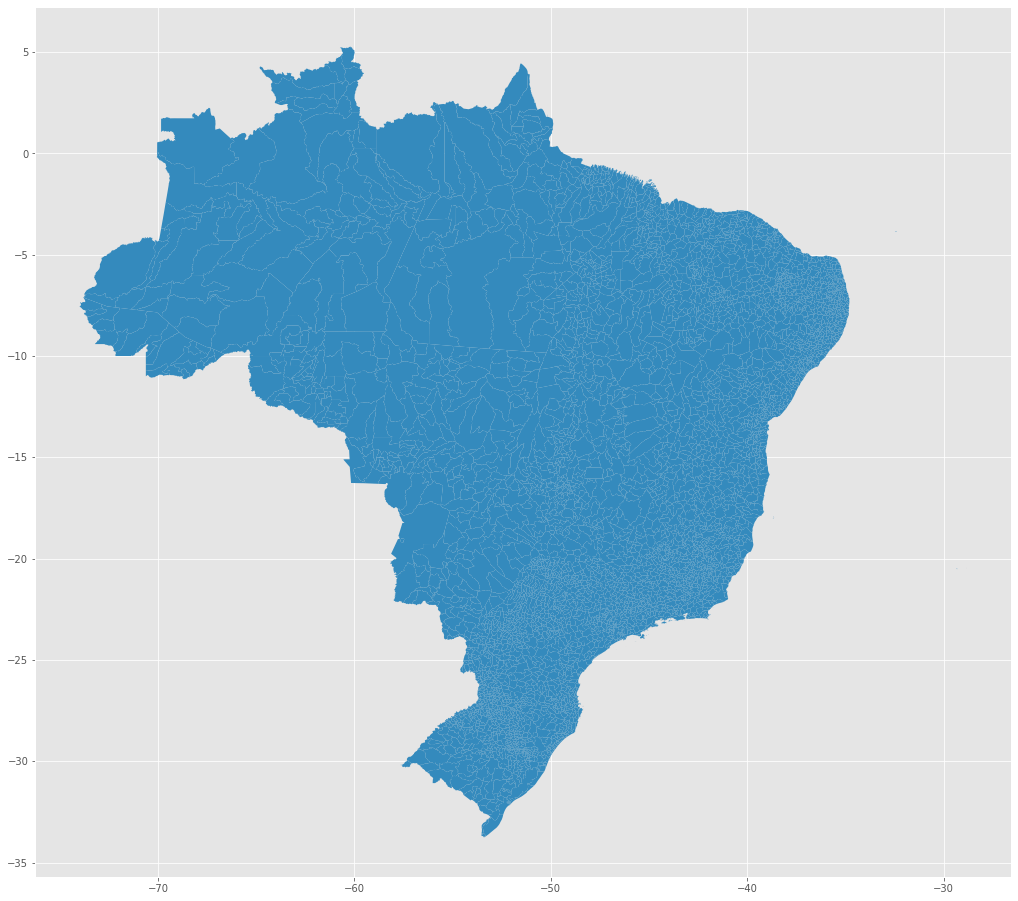

In [199]:
# Finalmente funfou porra! desvantagem comparado ao folium - não é dinâmico
# Daria pra pegar só do nordeste, faria mais sentido pra análise, além de ficar mais leve e com melhor zoom
br.plot(figsize=(30, 16))

# Juntando com tabela de população

In [361]:
pop_estimada = pd.read_csv('tabela6579_pop.csv', sep='delimiter')
# ou pop_estimada = pd.read_csv('tabela6579_pop.csv', on_bad_lines='skip')
pop_estimada

,Tabela 6579 - População residente estimada
0,"""Variável - População residente estimada (Pess..."
1,"""Município"";""Ano"""
2,"""Município"";""2021"""
3,"""Alta Floresta D'Oeste (RO)"";""22516"""
4,"""Ariquemes (RO)"";""111148"""
...,...
5732,"""..."";""Valor não disponível."
5733,Ex: A produção de feijão em determinado municí...
5734,"""A a Z"
5735,"(exceto X)"";""Significa uma faixa de valores. V..."


In [362]:
pop_residente = pd.read_excel('tabela1378_pop_residente.xlsx', usecols=)

In [363]:
pop_residente

,"Tabela 1378 - População residente, por situação do domicílio, sexo e idade, segundo a condição no domicílio e compartilhamento da responsabilidade pelo domicílio",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,Variável - População residente (Pessoas),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Município,Idade,Condição no domicílio e o compartilhamento da ...,Ano x Situação do domicílio x Sexo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,Total,NaN,NaN,Urbana,NaN,NaN,Rural,NaN,NaN
4,NaN,NaN,NaN,Total,Homens,Mulheres,Total,Homens,Mulheres,Total,Homens,Mulheres
...,...,...,...,...,...,...,...,...,...,...,...,...
5566,Vicentinópolis (GO),Total,Total,7371,3873,3498,6321,3294,3027,1050,579,471
5567,Vila Boa (GO),Total,Total,4735,2588,2147,3502,1875,1627,1233,713,520
5568,Vila Propício (GO),Total,Total,5145,2689,2456,1504,760,744,3641,1929,1712
5569,Brasília (DF),Total,Total,2570160,1228880,1341280,2482210,1180777,1301433,87950,48103,39847
